ШИФТ конкурс "Займы"

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

In [11]:
df = pd.read_csv('C:/Users/ivans/Shift/lending/X_train.csv', index_col="index")
y = pd.read_csv('C:/Users/ivans/Shift/lending/y_train.csv', index_col="index")
df['loan_status']=y['loan_status']
df.head()

,acc_now_delinq,addr_state,annual_inc,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_line,emp_length,fico_range_high,...,pub_rec_bankruptcies,purpose,revol_util,tax_liens,term,title,total_acc,verification_status,zip_code,loan_status
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,UT,80000.0,0.0,0.0,0.0,30.49,Oct-1996,4 years,689.0,...,1.0,credit_card,56.1%,0.0,36 months,Credit card refinancing,26.0,Source Verified,847xx,1
1,0.0,CA,82000.0,0.0,0.0,0.0,7.00,Mar-1993,10+ years,689.0,...,1.0,credit_card,88.3%,0.0,36 months,Credit card refinancing,11.0,Not Verified,900xx,0
2,0.0,NV,46080.0,0.0,0.0,1.0,17.32,Nov-2000,3 years,674.0,...,0.0,credit_card,18.1%,0.0,36 months,Credit card refinancing,31.0,Source Verified,895xx,1
3,0.0,AZ,30000.0,0.0,0.0,0.0,7.80,Jan-2010,< 1 year,694.0,...,0.0,car,33.4%,0.0,36 months,Car financing,24.0,Source Verified,853xx,0
4,0.0,OH,70000.0,0.0,0.0,0.0,13.36,Jan-2002,< 1 year,674.0,...,0.0,other,88.6%,0.0,60 months,Other,16.0,Not Verified,453xx,0


In [12]:
print(df.columns)

Index(['acc_now_delinq', 'addr_state', 'annual_inc',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'dti', 'earliest_cr_line', 'emp_length', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'home_ownership', 'inq_last_12m',
       'installment', 'int_rate', 'issue_d', 'loan_amnt', 'mort_acc',
       'mths_since_last_delinq', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'open_il_24m',
       'open_rv_24m', 'percent_bc_gt_75', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'revol_util', 'tax_liens', 'term', 'title', 'total_acc',
       'verification_status', 'zip_code', 'loan_status'],
      dtype='object')


In [13]:
df['fico_mean']=(df['fico_range_high']+df['fico_range_low'])/2
df['share_of_open_acc']=df['open_acc']/df['total_acc']
df['bad_rec']=(df['pub_rec']+df['pub_rec_bankruptcies'])/2
# df['number_of_rv_for_12m']=df['open_rv_24m']/2
df['credit_load']=df['installment']*12/df['annual_inc']
df['purpose'].replace(['credit_card', 'car', 'other', 'debt_consolidation',
       'major_purchase', 'small_business', 'home_improvement', 'moving',
       'medical', 'wedding', 'vacation', 'house', 'renewable_energy',
       'educational'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14], inplace=True)
df['term'].replace([' 36 months', ' 60 months'], [1,2], inplace=True)
df['verification_status'].replace(['Source Verified', 'Not Verified', 'Verified'], [1,2,3], inplace=True)
df['home_ownership'].replace(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], [1,2,3,2,2,2], inplace=True)
df['int_rate']=df['int_rate'].str.replace('%', '').astype(float)
df['revol_util']=df['revol_util'].str.replace('%', '').astype(float)
df['emp_length'].replace(['4 years', '10+ years', '3 years', '< 1 year', '5 years', '1 year',
       '7 years', '8 years', '2 years', '9 years', '6 years', np.nan], [4, 10,3,0.5,5,1,
       7,8,2,9, 6,10], inplace=True)
# df['year'] = pd.to_datetime(df['earliest_cr_line']).dt.year
df.loc[df['annual_inc']>160000, 'annual_inc']=df['annual_inc'].median()
# df = pd.get_dummies(data=df, columns=['verification_status'])

In [14]:
data['
data=pd.crosstab(df['verification_status'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data

loan_status,verification_status,0,1
0,Not Verified,0.850939,0.149061
1,Source Verified,0.799828,0.200172
2,Verified,0.768710,0.231290


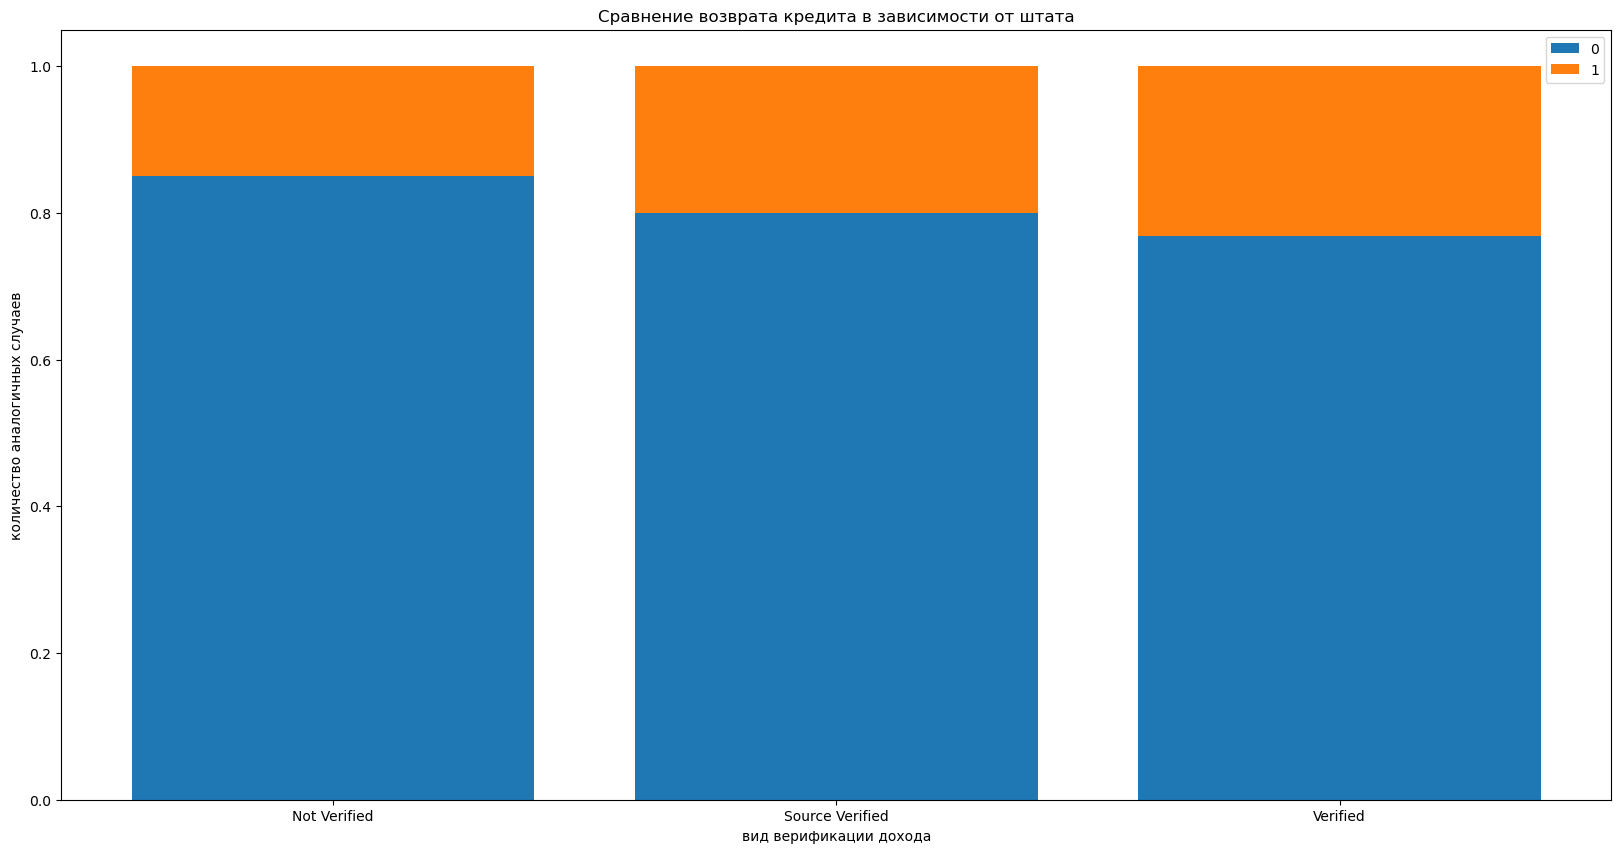

In [15]:
plt.figure(figsize=(20,10))
plt.bar(data['verification_status'], data[0], label='0')
plt.bar(data['verification_status'], data[1], bottom=data[0], label='1')
plt.title('Сравнение возврата кредита в зависимости от верификации')
plt.xlabel('вид верификации дохода')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks()
plt.show()

In [31]:
df['earliest_cr_line']

index
0          Oct-1996
1          Mar-1993
2          Nov-2000
3          Jan-2010
4          Jan-2002
             ...   
1199856    Feb-2002
1199857    Jan-2002
1199858    Nov-2002
1199859    Nov-1991
1199860    Sep-2007
Name: earliest_cr_line, Length: 1199861, dtype: object

In [32]:
df['year'] = pd.to_datetime(df['issue_d']).dt.year
df['year']

index
0          2016
1          2017
2          2016
3          2015
4          2017
           ... 
1199856    2012
1199857    2013
1199858    2015
1199859    2012
1199860    2015
Name: year, Length: 1199861, dtype: int64

In [33]:
df['month'] = pd.to_datetime(df['issue_d']).dt.month
df['month']

index
0           4
1           9
2           8
3           8
4           9
           ..
1199856     6
1199857    11
1199858    12
1199859     6
1199860     5
Name: month, Length: 1199861, dtype: int64

In [34]:
# df.loc[df['open_rv_24m']>8, 'open_rv_24m']=df['open_rv_24m'].median()

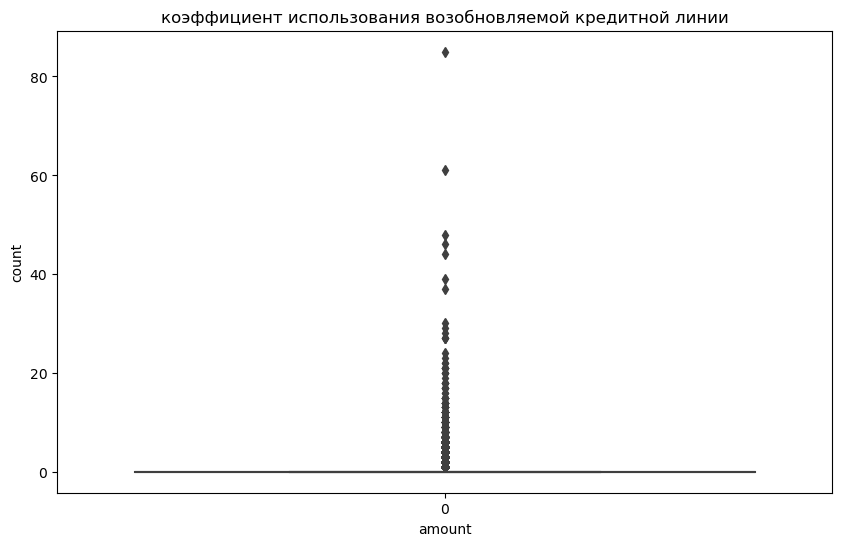

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(df['tax_liens'],whis=1.5)
plt.title('коэффициент использования возобновляемой кредитной линии')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

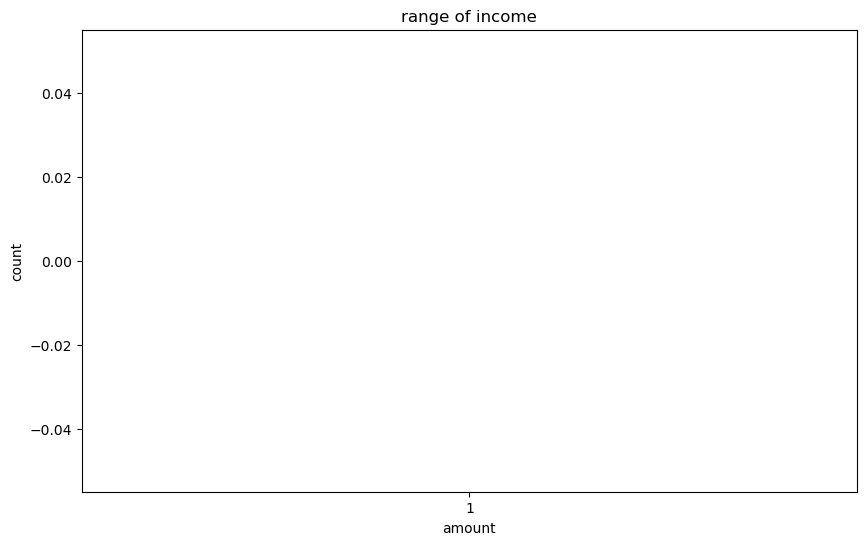

In [40]:
plt.figure(figsize=(10,6))
plt.boxplot(df['tax_liens'], showfliers=False)
plt.title('range of income')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

In [68]:
data=df.groupby('month')['loan_status'].agg(count='count').reset_index().sort_values(by='month')
data

,month,count
0,1,99064
1,2,89421
2,3,111869
3,4,102579
4,5,97915
5,6,91947
6,7,113755
7,8,101633
8,9,81745
9,10,116379


In [69]:
data=pd.crosstab(df['year'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data

loan_status,year,0,1
13,2020,0.986609,0.013391
2,2009,0.874960,0.125040
3,2010,0.872781,0.127219
4,2011,0.850014,0.149986
1,2008,0.844575,0.155425
6,2013,0.843646,0.156354
5,2012,0.836851,0.163149
12,2019,0.826232,0.173768
7,2014,0.822944,0.177056
0,2007,0.808642,0.191358


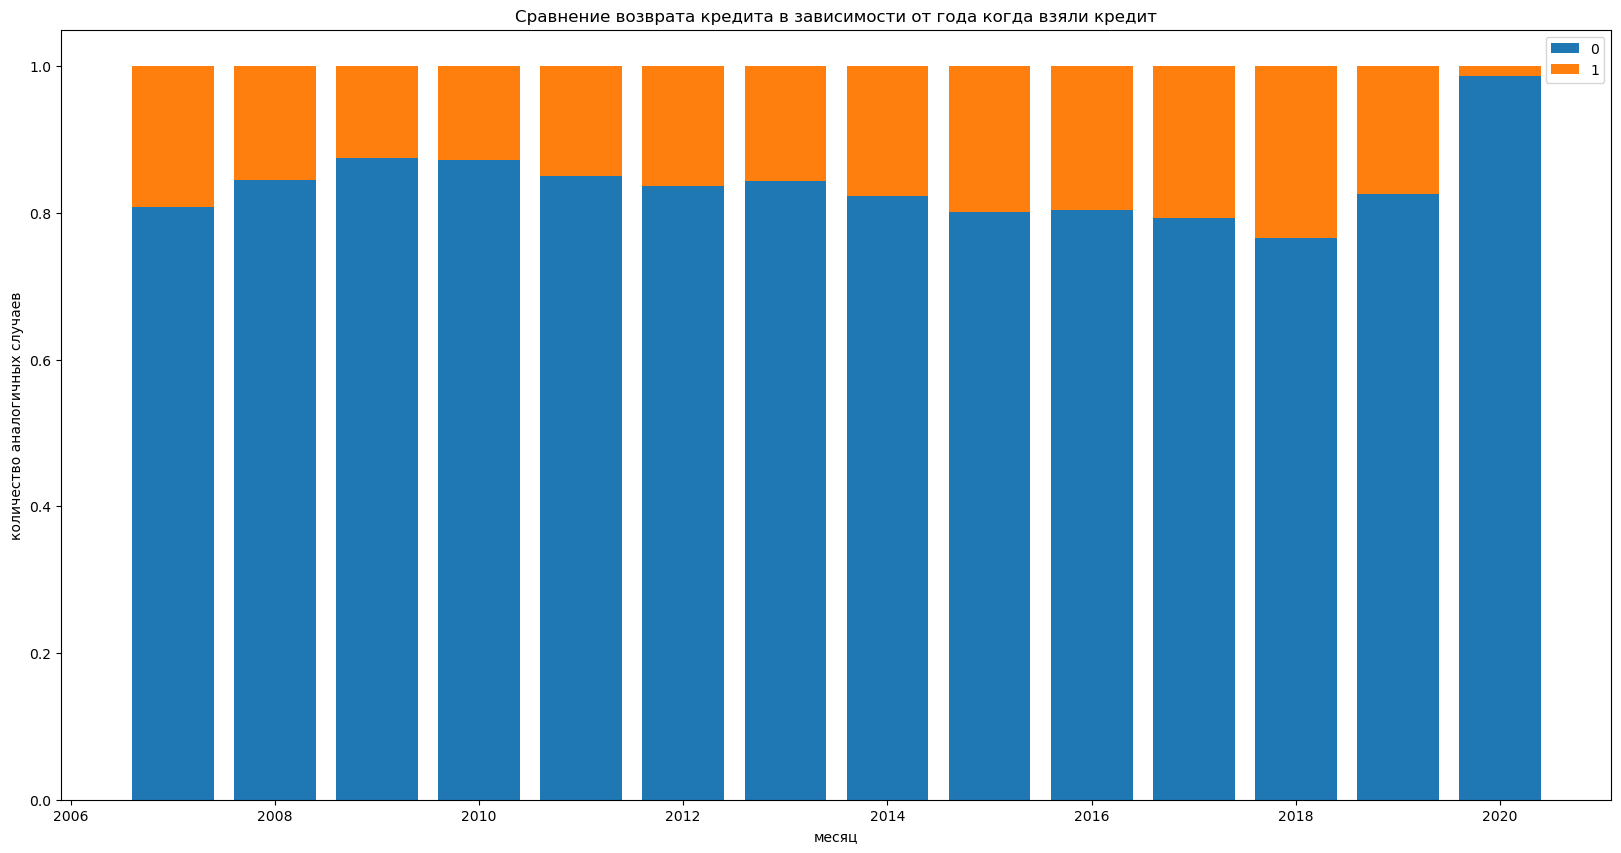

In [70]:
plt.figure(figsize=(20,10))
plt.bar(data['year'], data[0], label='0')
plt.bar(data['year'], data[1], bottom=data[0], label='1')
plt.title('Сравнение возврата кредита в зависимости от года когда взяли кредит')
plt.xlabel('месяц')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks()
plt.show()

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [72]:
plt.style.use('fivethirtyeight')

In [73]:
data=df.groupby('month')['loan_status'].agg(count='count').reset_index().sort_values(by='month')
data

,month,count
0,1,99064
1,2,89421
2,3,111869
3,4,102579
4,5,97915
5,6,91947
6,7,113755
7,8,101633
8,9,81745
9,10,116379


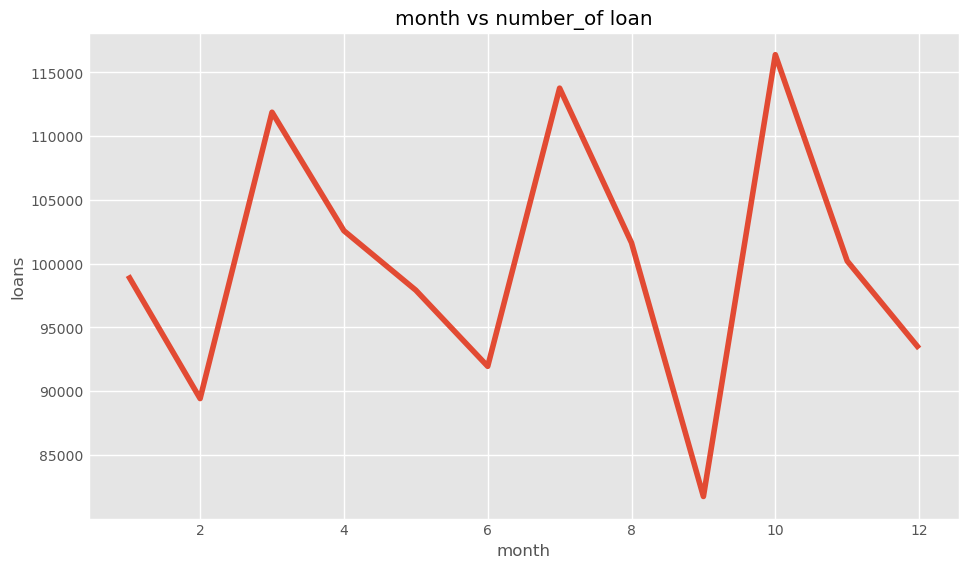

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(data['month'], data['count'])
plt.title('month vs number_of loan')
plt.xlabel('month')
plt.ylabel('loans')
plt.show()

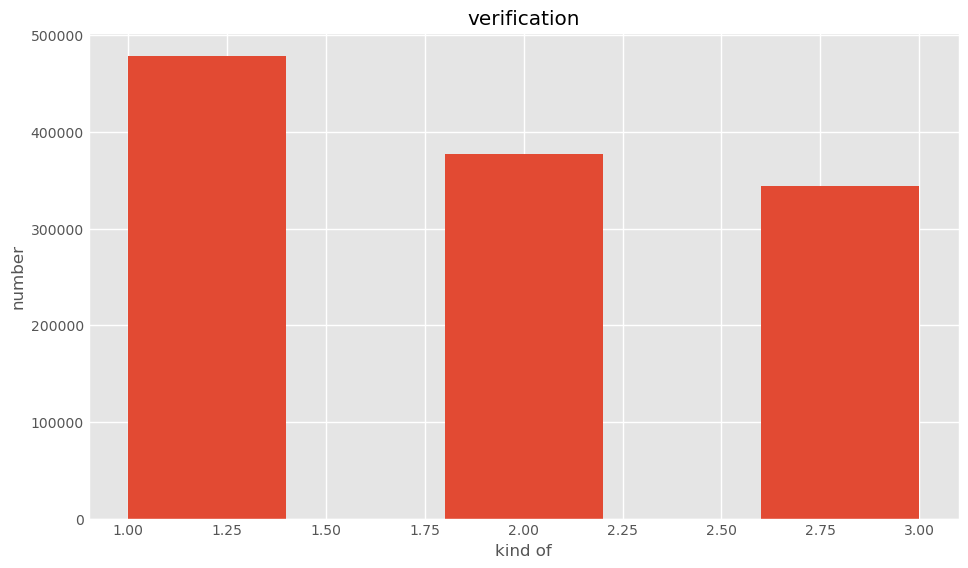

In [75]:
plt.figure(figsize=(10,6))
plt.hist(df['verification_status'], bins=5)
plt.title('verification')
plt.xlabel('kind of')
plt.ylabel('number')
plt.show()

In [76]:
data1=df[df['verification_status']=='Verified'].groupby('month_first')['zip_code'].agg(count='count').reset_index().sort_values(by='month_first')
data2=df[df['verification_status']=='Not Verified'].groupby('month_first')['zip_code'].agg(count='count').reset_index().sort_values(by='month_first')
data3=df[df['verification_status']=='Source Verified'].groupby('month_first')['zip_code'].agg(count='count').reset_index().sort_values(by='month_first')

KeyError: 'month_first'

In [ ]:
data3.head(12)

In [ ]:
gs = gridspec.GridSpec(1, 3)

pl.figure(figsize=(25,6))
ax = pl.subplot(gs[0, 0]) # row 0, col 0
ax.plot(data1['month_first'], data1['count'])
ax.set_title('month vs number_of first loan for verified income')
ax.set_xlabel('month_first')
ax.set_ylabel('number 0f loans for verified income')

ax = pl.subplot(gs[0, 1]) # row 0, col 1
ax.plot(data2['month_first'], data2['count'])
ax.set_title('month vs number_of first loan for not verified income')
ax.set_xlabel('month_first')
ax.set_ylabel('number 0f loans for not verified income')

ax = pl.subplot(gs[0, 2]) # row 1, span all columns
ax.plot(data3['month_first'], data3['count'])
ax.set_title('month vs number_of first loan for source verified income')
ax.set_xlabel('month_first')
ax.set_ylabel('number 0f loans for source verified income')

plt.show()

In [ ]:
plt.figure(figsize=(25,6))
plt.plot(data1['month_first'], data1['count'], label='verified')
plt.plot(data2['month_first'], data2['count'], label='not verified')
plt.plot(data3['month_first'], data3['count'], label='source verified')
plt.title('month vs number_of first loan with different kind of income verifications')
plt.xlabel('month')
plt.ylabel('number of first loans')
plt.legend()
plt.show()

In [ ]:
zero_data_emp=df['emp_length'].isnull().sum()
zero_data_emp

In [ ]:
unique_values=df['emp_length'].value_counts().reset_index().sort_values(by='emp_length')
unique_values
# unique_values=df.groupby('emp_length')['verification_status'].agg(count='Count').reset_index().sort_values('emp_length')

In [ ]:
df['emp_length'].replace(['4 years', '10+ years', '3 years', '< 1 year', '5 years', '1 year',
       '7 years', '8 years', '2 years', '9 years', '6 years', np.nan], [4, 10,3,0.5,5,1,
       7,8,2,9, 6,10], inplace=True)
df['emp_length']

In [ ]:
zero_data_emp=df['emp_length'].isnull().sum()
zero_data_emp

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['emp_length'], bins=10)
plt.title('employment lenght')
plt.xlabel('number of years')
plt.ylabel('count')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['emp_length'][df['loan_status']==0], alpha=0.5, label='0')
plt.hist(df['emp_length'][df['loan_status']==1], alpha=0.5, label='1')
plt.title('employment lenght vs loan status')
plt.xlabel('number of years')
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
data_new=df.groupby('emp_length')['loan_status'].sum().reset_index()
data_new.head()                                               

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data_new['emp_length'], data_new['loan_status'])
plt.title('number of bad loans vs number of employment length')
plt.xlabel('number of years of employment length')
plt.ylabel('count')
plt.show()

In [ ]:
df.columns

In [ ]:
df['int_rate']

In [ ]:
df['int_rate']=df['int_rate'].str.replace('%', '').astype(float)

In [ ]:
df['int_rate']

In [ ]:
df['revol_util']=df['revol_util'].str.replace('%', '').astype(float)

In [ ]:
df['revol_util']

In [ ]:
data1=df['int_rate'][df['loan_status']==1]
data2=df['int_rate'][df['loan_status']==0]

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot([data1, data2])
plt.title('number of bad loans vs interest_rate')
plt.xlabel('bad or good loans')
plt.ylabel('interest rate')
plt.xticks([1,2], ['bad loans', 'good loans'])
plt.show()

In [ ]:
data_d=df['purpose'].value_counts().reset_index()
data_d

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(data_d['index'], data_d['purpose'])
plt.title('Для чего брали кредит')
plt.xlabel('цель кредита')
plt.ylabel('количество аналогичных обращений')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data=pd.crosstab(df['purpose'], df['loan_status']).reset_index().sort_values(by=1)
data

In [ ]:
data=pd.crosstab(df['addr_state'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data

In [ ]:
plt.figure(figsize=(10,10))

n_ticks=np.arange(len(data[0]))
offset=0.2
w=0.4
plt.bar(n_ticks-offset, data[0], width=w, label='0')
plt.bar(n_ticks+offset, data[1], width=w, label='1')
plt.title('Сравнение возврата кредита в зависимости от цели кредита')
plt.xlabel('цель кредита')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks(n_ticks, data['purpose'], rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(data['purpose'], data[0], label='0')
plt.bar(data['purpose'], data[1], bottom=data[0], label='1')
plt.title('Сравнение возврата кредита в зависимости от цели кредита')
plt.xlabel('цель кредита')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
data=pd.crosstab(df['purpose'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(data['purpose'], data[0], label='0')
plt.bar(data['purpose'], data[1], bottom=data[0], label='1')
plt.title('Сравнение возврата кредита в зависимости от цели кредита')
plt.xlabel('цель кредита')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_else=pd.crosstab(df['emp_length'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data_else

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(data_else['emp_length'], data_else[0], label='0')
plt.bar(data_else['emp_length'], data_else[1], bottom=data_else[0], label='1')
plt.title('Сравнение возврата кредита в зависимости от стажа указанного при заявке')
plt.xlabel('стаж')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks()
plt.show()

In [ ]:
data=pd.crosstab(df['addr_state'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data

In [3]:
data_33=pd.crosstab(df['verification_status'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data_33

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(data_33['verification_status'], data_33[0], label='0')
plt.bar(data_33['verification_status'], data_33[1], bottom=data_33[0], label='1')
plt.title('Сравнение возврата кредита в зависимости от подтверждения дохода')
plt.xlabel('вид подтверждения')
plt.ylabel('количество аналогичных случаев')
plt.legend()
plt.xticks()
plt.show()

In [ ]:
data=df['loan_status'].value_counts()
data

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(data, autopct='%1.1f%%')
plt.title('Общая доля невозвращаемых кредитов')
plt.legend(data.index)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df['loan_status'], bins=10)
plt.xlabel('категории')
plt.ylabel('quantity')

plt.subplot(122)
sns.kdeplot(df['loan_status'], fill=True)
plt.xlabel('категории')
plt.ylabel('quantity')

plt.suptitle ('Распределение целевого признака по категориям')
plt.show()

In [ ]:
target_mean=round(df['loan_status'].mean(),2)
target_median=df['loan_status'].median()
target_mode=df['loan_status'].mode()[0]
print(target_mean)
print(target_median)
print(target_mode)

##### Анализ Количественных непрерывных данных

In [ ]:
df_num_unlim=df[['annual_inc','dti','funded_amnt','installment','int_rate','loan_amnt','percent_bc_gt_75','revol_util']]
df_num_unlim.head()

In [ ]:
df_num_unlim.hist(figsize=(16,16), bins=20, grid=False)

In [ ]:
df['annual_inc'].head()

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df['annual_inc'], showfliers=False)
plt.title('range of income')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

In [ ]:
df.loc[df['annual_inc']>160000, 'annual_inc']=df['annual_inc'].median()

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df['annual_inc'])
plt.title('range of income')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

In [ ]:
df_num_unlim=df[['annual_inc','dti','funded_amnt','installment','int_rate','loan_amnt','percent_bc_gt_75','revol_util']]
df_num_unlim.hist(figsize=(16,16), bins=20, grid=False)

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['revol_util'],whis=1.5,showfliers=False)
plt.title('коэффициент использования возобновляемой кредитной линии')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

In [ ]:
df.loc[df['revol_util']>100, 'revol_util']=df['revol_util'].median()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['dti'],whis=1.5)
plt.title('коэффициент использования возобновляемой кредитной линии')
plt.xlabel('amount')
plt.ylabel('count')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(df['int_rate'],whis=1.5)
plt.title('ставки по кредитам')
plt.xlabel('размер')
plt.ylabel('количество')
plt.show()

In [ ]:
# df.loc[df['int_rate']>25, 'int_rate']=df['int_rate'].median()

In [ ]:
# plt.figure(figsize=(10,6))
# sns.boxplot(df['int_rate'],whis=1.5)
# plt.title('ставки по кредитам')
# plt.xlabel('размер')
# plt.ylabel('количество')
# plt.show()

In [ ]:
df_num_unlim=df[['annual_inc','dti','funded_amnt','installment','int_rate','loan_amnt','percent_bc_gt_75','revol_util']]
df_num_unlim.hist(figsize=(16,16), bins=20, grid=False)

In [ ]:
df_num_unlim.head()
# compare_date=df[['annual_inc', 'installment']]
# compare_date.head()

In [ ]:
# df_num_unlim.head()
# # compare_date=df[['annual_inc', 'installment']]
# # compare_date.head()

# # plt.figure(figsize=(15, 10))
# # ax = sns.regplot(x='annual_inc', y='installment', data=compare_date, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
# # sns.set(font_scale=2.0)
# # sns.set_style('whitegrid')
# # ax.set(xlabel='показатель Х', ylabel='показатель Y')
# # ax.set_title('Зависимость двух показателей')
# # plt.show()

In [ ]:
df_num_lim=df[['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'fico_range_high','fico_range_low','inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_bc_dlq','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
             'open_acc','open_il_24m','open_rv_24m','pub_rec','pub_rec_bankruptcies', 'tax_liens','total_acc']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.4]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df.columns

In [ ]:
df['fico_mean']=(df['fico_range_high']+df['fico_range_low'])/2
df.drop(['fico_range_high','fico_range_low'], axis=1,inplace=True)
df.head()

In [ ]:
df_num_lim=df[['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_bc_dlq','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
             'open_acc','open_il_24m','open_rv_24m','pub_rec','pub_rec_bankruptcies', 'tax_liens','total_acc','fico_mean']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.4]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df.drop(['num_sats'], axis=1,inplace=True)

In [ ]:
df_num_lim=df[['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_bc_dlq','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
             'open_acc','open_il_24m','open_rv_24m','pub_rec','pub_rec_bankruptcies', 'tax_liens','total_acc','fico_mean']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.4]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df['share_of_open_acc']=df['open_acc']/df['total_acc']
df.drop(['open_acc','total_acc'], axis=1,inplace=True)
df.head()

In [ ]:
df_num_lim=df[['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_bc_dlq','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
               'open_il_24m','open_rv_24m','pub_rec','pub_rec_bankruptcies', 'tax_liens','fico_mean','share_of_open_acc']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.4]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df.drop(['acc_now_delinq','addr_state', 'title', 'zip_code', 'earliest_cr_line', 'issue_d'], axis=1, inplace=True)
df.head()

In [ ]:
df_num_lim=df[['chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_bc_dlq','mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
               'open_il_24m','open_rv_24m','pub_rec','pub_rec_bankruptcies', 'tax_liens','fico_mean','share_of_open_acc']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.4]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df.drop(['mths_since_recent_bc_dlq'], axis=1, inplace=True)
df_num_lim=df[['chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
               'open_il_24m','open_rv_24m','pub_rec','pub_rec_bankruptcies', 'tax_liens','fico_mean','share_of_open_acc']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.4]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df['bad_rec']=(df['pub_rec']+df['pub_rec_bankruptcies'])/2
df.drop(['pub_rec','pub_rec_bankruptcies'], axis=1,inplace=True)
df_num_lim=df[['chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
               'open_il_24m','open_rv_24m','tax_liens','fico_mean','share_of_open_acc','bad_rec']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.5]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
zero_data_set_sum=df.isnull().sum()
zero_data_set_percentage=df.isnull().sum()/df.shape[0]*100
zero_data_set=pd.DataFrame({'sum':zero_data_set_sum, 'percentage': zero_data_set_percentage})
zero_data_set[zero_data_set['sum']>0].head(40)

In [ ]:
df['number_of_rv_for_12m']=df['open_rv_24m']/2
df.drop(['num_tl_op_past_12m','open_rv_24m'], axis=1,inplace=True)
df_num_lim=df[['chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_2yrs',
             'inq_last_12m','mort_acc','mths_since_last_delinq',
             'mths_since_recent_inq','num_accts_ever_120_pd','num_actv_bc_tl',
             'num_rev_accts','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
               'open_il_24m','tax_liens','fico_mean','share_of_open_acc','bad_rec', 'number_of_rv_for_12m']]
df_num_lim.head()

In [ ]:
plt.figure(figsize=(25,25))

sns.set(font_scale=1)

corr_matrix=df_num_lim.corr()
corr_matrix=np.round(corr_matrix,2)
corr_matrix[np.abs(corr_matrix)<0.5]=0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation')
plt.show()

In [ ]:
df.drop(['emp_length'], axis=1, inplace=True)

In [ ]:
df.info()

In [ ]:
data_term=pd.crosstab(df['term'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data_term.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(data_term['term'], data_term[0], label='0')
plt.bar(data_term['term'], data_term[1], bottom=data_term[0], label='1')
plt.title('Распеределение невозвратов по кредитам в зависимости от срока')
plt.xlabel('срок')
plt.ylabel('количество в долях')
plt.legend()
plt.xticks()
plt.show()
# plt.figure(figsize=(12,10))
# plt.bar(data_else['emp_length'], data_else[0], label='0')
# plt.bar(data_else['emp_length'], data_else[1], bottom=data_else[0], label='1')
# plt.title('Сравнение возврата кредита в зависимости от стажа указанного при заявке')
# plt.xlabel('стаж')
# plt.ylabel('количество аналогичных случаев')
# plt.legend()
# plt.xticks()
# plt.show()

In [ ]:
df['purpose'].unique().shape

In [ ]:
df['purpose'].replace(['credit_card', 'car', 'other', 'debt_consolidation',
       'major_purchase', 'small_business', 'home_improvement', 'moving',
       'medical', 'wedding', 'vacation', 'house', 'renewable_energy',
       'educational'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13], inplace=True)
df['purpose'].value_counts()

In [ ]:
data_ver=pd.crosstab(df['verification_status'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data_ver.head()

In [ ]:
data_home=pd.crosstab(df['home_ownership'], df['loan_status'], normalize='index').reset_index().sort_values(by=1)
data_home.head()

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['home_ownership'], bins=10)
plt.title('status')
plt.xlabel('kind of')
plt.ylabel('count')
plt.show()

In [ ]:
ownership_mode=df['home_ownership'].mode()[0]
ownership_mode

In [ ]:
df['home_ownership'].unique()

In [ ]:
df['home_ownership'].replace(['OTHER', 'ANY', 'NONE'],['MORTGAGE','MORTGAGE','MORTGAGE'], inplace=True)

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['home_ownership'], bins=10)
plt.title('status')
plt.xlabel('kind of')
plt.ylabel('count')
plt.show()

In [ ]:
df['home_ownership'].unique()

In [ ]:
df['home_ownership'].replace(['RENT', 'MORTGAGE', 'OWN'], [0,1,3], inplace=True)
df['home_ownership'].value_counts()

In [ ]:
df.info()

In [ ]:
df['term'].unique()

In [ ]:
df['term'].replace([' 36 months', ' 60 months'], [0,1], inplace=True)
df['term'].value_counts()

In [ ]:
df.drop(['month_first'], axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
df['credit_load']=df['installment']*12/df['annual_inc']

In [ ]:
compare_date1=df[['credit_load', 'loan_status']]
compare_date2=df[['chargeoff_within_12_mths', 'loan_status']]
compare_date3=df[['collections_12_mths_ex_med', 'loan_status']]
compare_date4=df[['delinq_2yrs', 'loan_status']]
compare_date5=df[['dti', 'loan_status']]
compare_date6=df[['funded_amnt', 'loan_status']]
compare_date7=df[['home_ownership', 'loan_status']]
compare_date8=df[['inq_last_12m', 'loan_status']]
compare_date9=df[['installment', 'loan_status']]
compare_date10=df[['mths_since_last_delinq', 'loan_status']]
compare_date11=df[['mths_since_recent_inq', 'loan_status']]
compare_date12=df[['num_accts_ever_120_pd', 'loan_status']]
compare_date13=df[['num_actv_bc_tl', 'loan_status']]
compare_date14=df[['num_rev_accts', 'loan_status']]
compare_date15=df[['num_tl_120dpd_2m', 'loan_status']]
compare_date16=df[['num_tl_30dpd', 'loan_status']]
compare_date17=df[['num_tl_90g_dpd_24m', 'loan_status']]
compare_date18=df[['open_il_24m', 'loan_status']]
compare_date19=df[['percent_bc_gt_75', 'loan_status']]
compare_date20=df[['revol_util', 'loan_status']]
compare_date21=df[['tax_liens', 'loan_status']]
compare_date22=df[['fico_mean', 'loan_status']]
compare_date23=df[['share_of_open_acc', 'loan_status']]
compare_date24=df[['bad_rec', 'loan_status']]
compare_date25=df[['number_of_rv_for_12m', 'loan_status']]
compare_date26=df[['int_rate', 'loan_status']]
compare_date27=df[['loan_amnt', 'loan_status']]
compare_date28=df[['mort_acc', 'loan_status']]
compare_date29=df[['purpose', 'loan_status']]

In [ ]:
compare_date1.head()

In [ ]:
compare_date25.iloc[:,0]

In [ ]:
compare_date25.columns[1]

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date1.iloc[:,0], y=compare_date1.iloc[:,1], data=compare_date1, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date1.columns[0], ylabel=compare_date1.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date2.iloc[:,0], y=compare_date2.iloc[:,1], data=compare_date2, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date2.columns[0], ylabel=compare_date2.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date3.iloc[:,0], y=compare_date3.iloc[:,1], data=compare_date3, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date3.columns[0], ylabel=compare_date3.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date4.iloc[:,0], y=compare_date4.iloc[:,1], data=compare_date4, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date4.columns[0], ylabel=compare_date4.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date5.iloc[:,0], y=compare_date5.iloc[:,1], data=compare_date5, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date5.columns[0], ylabel=compare_date5.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date6.iloc[:,0], y=compare_date6.iloc[:,1], data=compare_date6, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date6.columns[0], ylabel=compare_date6.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date7.iloc[:,0], y=compare_date7.iloc[:,1], data=compare_date7, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date7.columns[0], ylabel=compare_date7.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date8.iloc[:,0], y=compare_date8.iloc[:,1], data=compare_date8, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date8.columns[0], ylabel=compare_date8.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date9.iloc[:,0], y=compare_date9.iloc[:,1], data=compare_date9, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date9.columns[0], ylabel=compare_date9.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date10.iloc[:,0], y=compare_date10.iloc[:,1], data=compare_date10, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date10.columns[0], ylabel=compare_date10.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date11.iloc[:,0], y=compare_date11.iloc[:,1], data=compare_date11, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date11.columns[0], ylabel=compare_date11.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date12.iloc[:,0], y=compare_date12.iloc[:,1], data=compare_date12, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date12.columns[0], ylabel=compare_date12.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date13.iloc[:,0], y=compare_date13.iloc[:,1], data=compare_date13, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date13.columns[0], ylabel=compare_date13.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date14.iloc[:,0], y=compare_date14.iloc[:,1], data=compare_date14, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date14.columns[0], ylabel=compare_date14.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date15.iloc[:,0], y=compare_date15.iloc[:,1], data=compare_date15, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date15.columns[0], ylabel=compare_date15.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date16.iloc[:,0], y=compare_date16.iloc[:,1], data=compare_date16, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date16.columns[0], ylabel=compare_date16.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date17.iloc[:,0], y=compare_date17.iloc[:,1], data=compare_date17, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date17.columns[0], ylabel=compare_date17.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date18.iloc[:,0], y=compare_date18.iloc[:,1], data=compare_date18, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date18.columns[0], ylabel=compare_date18.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date19.iloc[:,0], y=compare_date19.iloc[:,1], data=compare_date19, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date19.columns[0], ylabel=compare_date19.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date20.iloc[:,0], y=compare_date20.iloc[:,1], data=compare_date20, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date20.columns[0], ylabel=compare_date20.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date21.iloc[:,0], y=compare_date21.iloc[:,1], data=compare_date21, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date21.columns[0], ylabel=compare_date21.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date22.iloc[:,0], y=compare_date22.iloc[:,1], data=compare_date22, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date22.columns[0], ylabel=compare_date22.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date23.iloc[:,0], y=compare_date23.iloc[:,1], data=compare_date23, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date23.columns[0], ylabel=compare_date23.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date24.iloc[:,0], y=compare_date24.iloc[:,1], data=compare_date24, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date24.columns[0], ylabel=compare_date24.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date25.iloc[:,0], y=compare_date25.iloc[:,1], data=compare_date25, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date25.columns[0], ylabel=compare_date25.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date26.iloc[:,0], y=compare_date26.iloc[:,1], data=compare_date26, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date26.columns[0], ylabel=compare_date26.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date27.iloc[:,0], y=compare_date27.iloc[:,1], data=compare_date27, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date27.columns[0], ylabel=compare_date27.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date28.iloc[:,0], y=compare_date28.iloc[:,1], data=compare_date28, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date28.columns[0], ylabel=compare_date28.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date29.iloc[:,0], y=compare_date29.iloc[:,1], data=compare_date29, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date29.columns[0], ylabel=compare_date29.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()

In [ ]:
compare_date30=df[['term','loan_status']]

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=compare_date30.iloc[:,0], y=compare_date30.iloc[:,1], data=compare_date30, color='green', marker='+', scatter_kws={"color": "green"}, line_kws={"color": "red"})
sns.set(font_scale=2.0)
sns.set_style('whitegrid')
ax.set(xlabel=compare_date30.columns[0], ylabel=compare_date30.columns[1])
ax.set_title('Зависимость двух показателей')
plt.show()